In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/SignData
#!unzip archive.zip -d archive

Mounted at /content/drive
/content/drive/MyDrive/SignData


In [3]:
!ls
%cd archive
!ls

archive  archive.zip
/content/drive/MyDrive/SignData/archive
american_sign_language.PNG  amer_sign3.png   sign_mnist_test.csv  sign_mnist_train.csv
amer_sign2.png		    sign_mnist_test  sign_mnist_train	  smnist.h5


In [4]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

y_train = train_df['label']
y_test = test_df['label']


In [5]:
train_df.head(50)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [6]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


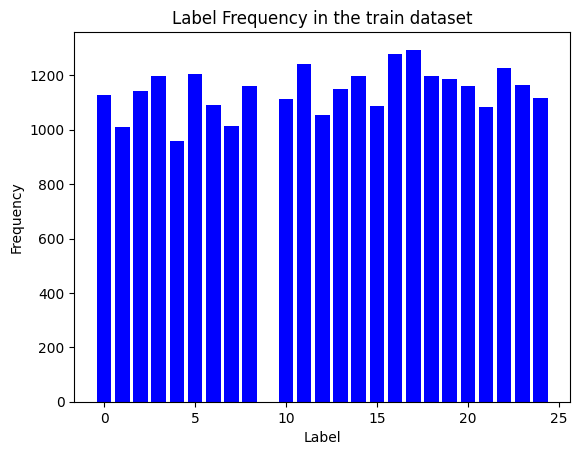

In [7]:
## Counting the frequency of each label in the train set
lab_counts = y_train.value_counts().sort_index()

plt.bar(lab_counts.index, lab_counts.values, color = 'blue')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Label Frequency in the train dataset')
plt.show()

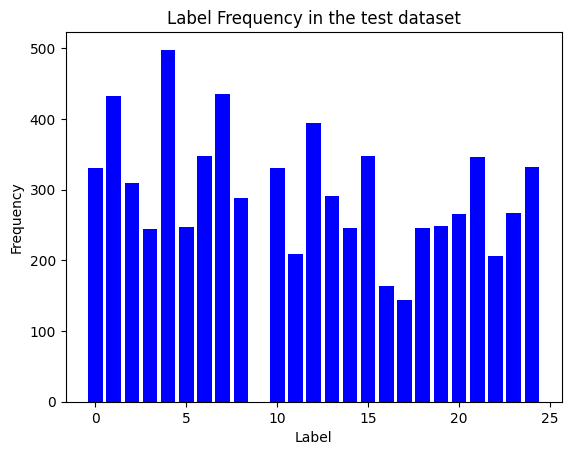

In [8]:
## frequency in test set
lab_counts = y_test.value_counts().sort_index()

plt.bar(lab_counts.index, lab_counts.values, color = 'blue')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Label Frequency in the test dataset')
plt.show()

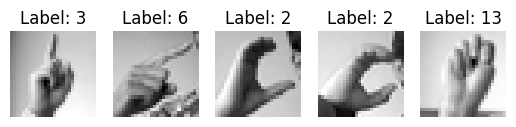

In [9]:
pixels = train_df.iloc[:, 1:].values
labs = train_df['label'].values

images = pixels.reshape(-1, 28, 28)
num_img_plt = 5

for i in range(num_img_plt):
  plt.subplot(1, num_img_plt, i+1)
  plt.imshow(images[i], cmap = 'gray')
  plt.title(f"Label: {labs[i]}")
  plt.axis('off')

plt.show()

In [10]:
del train_df['label']
del test_df['label']

In [11]:

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

x_train = train_df.values
x_test = test_df.values

x_train = x_train / 255
x_test = x_test / 255

In [12]:
print("---------------------------------------")
print("----------- BEFORE RESHAPING ----------")
print("---------------------------------------")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

---------------------------------------
----------- BEFORE RESHAPING ----------
---------------------------------------
x_train shape: (27455, 784)
x_test shape: (7172, 784)
y_train shape: (27455, 24)
y_test shape: (7172, 24)


In [13]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [14]:
print("---------------------------------------")
print("----------- AFTER RESHAPING ----------")
print("---------------------------------------")

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

---------------------------------------
----------- AFTER RESHAPING ----------
---------------------------------------
x_train shape: (27455, 28, 28, 1)
x_test shape: (7172, 28, 28, 1)
y_train shape: (27455, 24)
y_test shape: (7172, 24)


In [15]:
from keras.preprocessing.image import ImageDataGenerator
## not necessary
def augment(x_train):
  datagen = ImageDataGenerator(
          featurewise_center=False,
          samplewise_center=False,
          featurewise_std_normalization=False,
          samplewise_std_normalization=False,
          zca_whitening=False,
          rotation_range=10,
          zoom_range = 0.1,
          width_shift_range=0.1,
          height_shift_range=0.1,
          horizontal_flip=False,
          vertical_flip=False)

  datagen.fit(x_train)
  return datagen

In [16]:
def def_mod():
  model = Sequential()
  model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Flatten())
  model.add(Dense(units = 512 , activation = 'relu'))
  model.add(Dropout(0.3))
  model.add(Dense(units = 24 , activation = 'softmax'))
  model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
  model.summary()
  return model

In [28]:
def evaluate(dataX, dataY, n_folds = 5):
  scores, histories = list(), list()
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  for train_ix, test_ix in kfold.split(dataX):
    model = def_mod()
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix],dataY[test_ix]
    #trainX = augment(np.asarray(trainX))
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX,testY), verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=0)
    print(' > %.3f ' % (acc * 100.0))
    scores.append(acc)
    histories.append(history)
  model.save('american_sign_v2_1.h5')
  return scores, histories


In [18]:
def diagnostics(histories):
  for i in range(len(histories)):
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color= 'blue' , label= 'train')
    plt.plot(histories[i].history['val_loss'], color= 'orange', label='test' )

    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color= 'blue', label= 'train' )
    plt.plot(histories[i].history['val_accuracy'], color= 'orange', label= 'test')

  plt.show()

In [19]:
def summarize(scores):
  print('Accuracy: mean=%.3f std=%.3f, n=%d'% (mean(scores)*100, std(scores)*100,len(scores)))
  plt.boxplot(scores)
  plt.show()

In [ ]:
#model = def_model()
#history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test))
#model.save('american_sign_v2.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)        2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 batch_normalization_9 (Bat  (None, 28, 28, 75)        300       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 75)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 50)        33800     
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_10 (Ba  (None, 14, 14, 50)       

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


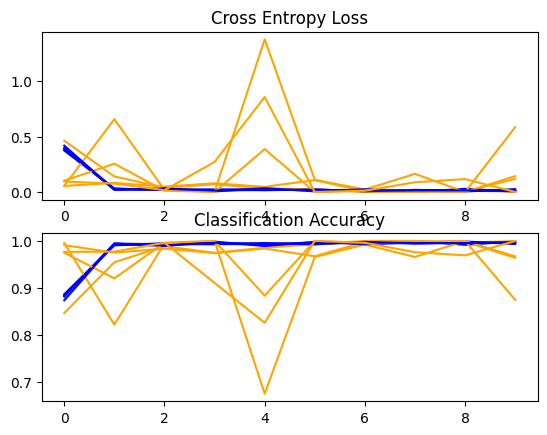

NameError: name 'mean' is not defined

In [26]:
scores, histories = evaluate(x_train, y_train)
diagnostics(histories)
summarize(scores)

Accuracy: mean=96.088 std=4.588, n=5


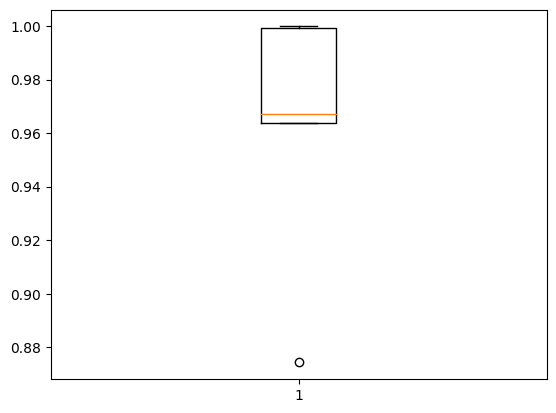

In [29]:
summarize(scores)